# Using GeoData With Madgrigal
This notebook will give an example of how to use GeoData plotting functions with data from Madgrigal. The example takes ISR data, plots out plasma parameters over both range and time for one beam and then the values from the same beam over one time.

In [29]:
%matplotlib inline
import matplotlib
import os
import scipy as sp
import matplotlib.pyplot as plt
from GeoData.GeoData import GeoData
from GeoData.utilityfuncs import readMad_hdf5
from GeoData.plotting import rangevsparam, rangevstime

## Read in Data
The first step is to read the data into the GeoData format. The user does this by creating a GeoData instance, as input it takes the read function, in this case readMad_hdf5, and a list of inputs. The subsequent lines are taking the log scaled electron density and putting them in a linear scale.

In [30]:
madfile = os.path.join( '~/Documents/ISRData/20140107/pfa140105.004.hdf5')
data1 = GeoData(readMad_hdf5,[madfile,['nel','te','ti','vo','dnel','dte','dti','dvo']])
data1.data['ne']=sp.power(10.,data1.data['nel'])
data1.data['dne']=sp.power(10.,data1.data['dnel'])

## Range Time Plots
This set of plots will show the fitted plasma parameter values as a function of range and time. The specific beam chosen is pointed toward zenith so the slant range can be thought of as altitude.

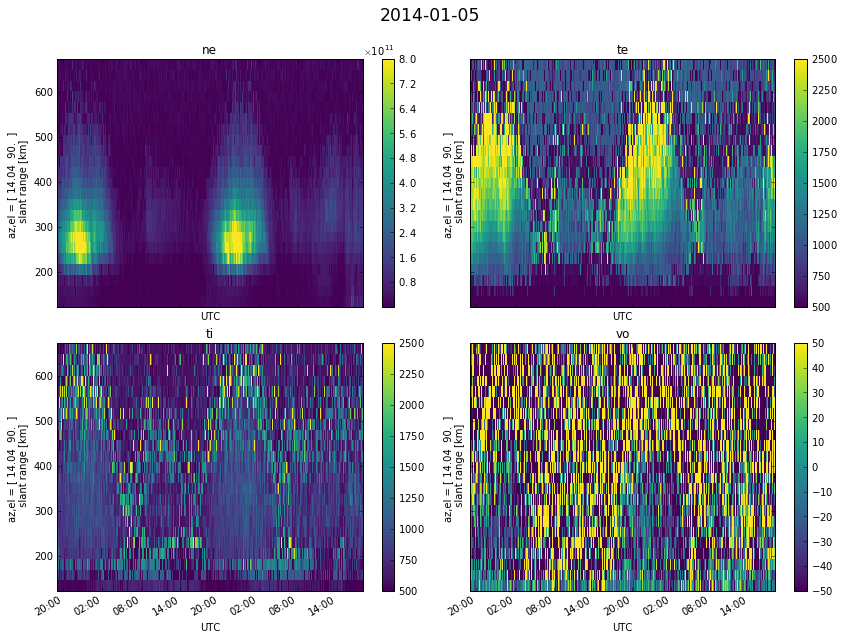

In [31]:
fig1,axmat =plt.subplots(2,2,figsize = (12,9),sharey=True,sharex=True)
axvec = axmat.flatten()
desired_beam = data1.dataloc[0,1:]
rangevstime(data1,desired_beam,vbounds=[1e9,8e11],gkey='ne',fig=fig1,ax=axvec[0])
rangevstime(data1,desired_beam,vbounds=[500.,2500.],gkey='te',fig=fig1,ax=axvec[1])
rangevstime(data1,desired_beam,vbounds=[500.,2500.],gkey='ti',fig=fig1,ax=axvec[2])
rangevstime(data1,desired_beam,vbounds=[-50.,50.],gkey='vo',fig=fig1,ax=axvec[3])
plt.tight_layout()
plt.subplots_adjust(top=0.9)

## Range vs Parameter Plots
Now ploting data from a single time. 

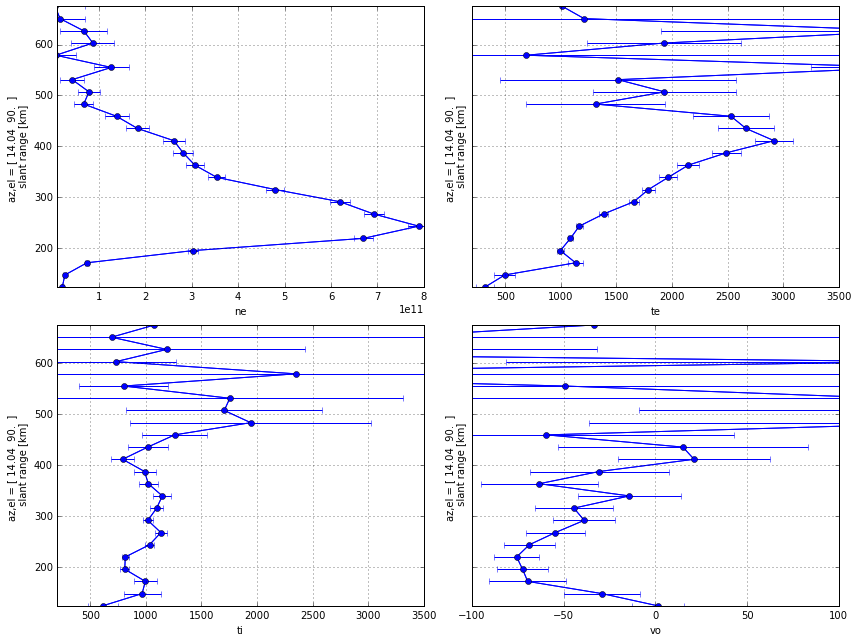

In [32]:
fig2,axmat2 =plt.subplots(2,2,figsize = (12,9),sharey=True,sharex=False)
axvec2 = axmat2.flatten()
paramlist = ['ne','te','ti','vo']
time1=335
handvec = []
pbounds = [[1e10,8e11],[200.,3500.],[200.,3500.],[-100.,100.]]
for inum, iax in enumerate(axvec2):
    ploth = rangevsparam(data1,desired_beam,time1,gkey=paramlist[inum],gkeyerr='d'+paramlist[inum],fig=fig1,ax=iax,it=False)
    iax.grid(True)
    iax.set_xlim(pbounds[inum])
    handvec.append(ploth)
plt.tight_layout()